In [15]:
import pandas as pd
import re

In [16]:
data = pd.read_csv(r"C:\Users\Keira\Data Pengaruh Strategi Pemasaran Omnichannel Dengan Loyalitas Pelanggan.csv")

**PROCESS DATA**

In [17]:
# Define a function to extract latent variable names
def extract_variable_name(column_name):
    # Match the content in parentheses
    match = re.search(r"\((.*?)\)", column_name)
    if match:
        return match.group(1).strip()  # Extract the latent variable (e.g., EN, PE)
    return column_name  # Return the original name if no match

# Rename columns using the function
data.rename(columns={
    " Saya merasa berbelanja di platform ini menyenangkan. (EN)": "EN1",
    "Menggunakan platform ini adalah pengalaman yang mengasyikkan. (EN)": "EN2",
    "Menjelajahi produk di platform ini memberi saya rasa kepuasan. (EN)": "EN3",
    "Saya puas dengan kualitas produk yang ditawarkan di platform ini.  (CS)": "CS1",
    "Pengalaman berbelanja di platform ini memenuhi harapan saya. (CS)": "CS2",
    "Saya merasa senang dengan layanan pelanggan yang diberikan oleh platform ini. (CS)":"CS3",
    "Saya lebih suka berbelanja di platform ini dibandingkan dengan yang lain. (BL)": "BL1",
    "Saya cenderung terus menggunakan platform ini untuk pembelian di masa depan. (BL)":"BL2",
    "Saya akan merekomendasikan platform ini kepada teman dan keluarga. (BL)":"BL3",
    "Saya percaya pada informasi yang diberikan tentang produk di platform ini. (TR)":"TR1",
    "Saya percaya platform ini mengutamakan kepentingan saya sebagai pelanggan. (TR)":"TR2",
    "Platform ini menangani data pribadi saya dengan aman. (TR)": "TR3",
    "Platform ini membantu saya menghemat waktu saat berbelanja online. (PU)": "PU1",
    "Fitur-fitur di platform ini membuat belanja menjadi lebih nyaman.  (PU)":"PU2",
    "Menggunakan platform ini meningkatkan efisiensi belanja saya. (PU)" : "PU3",
    "Mudah untuk menavigasi antarmuka platform ini. (PEOU)":"PEOU1",
    "Saya merasa mudah mencari produk di platform ini. (PEOU)" :"PEOU2",
    "Belajar menggunakan platform ini sangat sederhana.  (PEOU)" : "PEOU3",
    "Saya khawatir dengan kualitas produk yang dibeli di platform ini. (PR)":"PR1",
    "Ada risiko data pribadi saya disalahgunakan di platform ini. (PR)": "PR2",
    "Saya khawatir tentang penjual palsu di platform ini. (PR)":"PR3",
    "Teman dan keluarga saya merekomendasikan menggunakan platform ini. (SI)":"SI1",
    "Popularitas platform ini memengaruhi keputusan saya untuk menggunakannya. (SI)":"SI2",
    "Ulasan tentang platform ini mendorong saya untuk berbelanja di sini. (SI)":"SI3"
}, inplace=True
)

# Verify the changes
print(data.columns)

Index(['Timestamp', 'Gender', 'Umur', 'Jenjang Pendidikan',
       'Apakah anda lumayan sering berbelanja lewat online shopping platforms khususnya Shopee',
       'Berapa lama Anda telah menggunakan platform belanja online Shopee',
       'EN1', 'EN2', 'EN3', 'CS1', 'CS2', 'CS3', 'BL1', 'BL2', 'BL3', 'TR1',
       'TR2', 'TR3', 'PU1', 'PU2', 'PU3', 'PEOU1', 'PEOU2', 'PEOU3', 'PR1',
       'PR2', 'PR3', 'SI1', 'SI2', 'SI3'],
      dtype='object')


In [18]:
#check for missing value
print(data.isnull().sum())

Timestamp                                                                                  0
Gender                                                                                    19
Umur                                                                                       0
Jenjang Pendidikan                                                                         0
Apakah anda lumayan sering berbelanja lewat online shopping platforms khususnya Shopee     0
Berapa lama Anda telah menggunakan platform belanja online Shopee                          0
EN1                                                                                        0
EN2                                                                                        0
EN3                                                                                        0
CS1                                                                                        0
CS2                                                                   

In [19]:
# Replace missing values with mean for integers, mode for others
for column in data.columns:
    if data[column].isnull().any():  # Check if the column has missing values
        if pd.api.types.is_integer_dtype(data[column]):  # Check if column is integer
            mean_value = data[column].mean()  # Calculate mean
            data[column].fillna(mean_value, inplace=True)  # Replace NaN with mean
        else:  # For other data types (e.g., strings or categories)
            mode_value = data[column].mode()[0]  # Calculate mode
            data[column].fillna(mode_value, inplace=True)  # Replace NaN with mode

# Verify that there are no missing values left
print(data.isnull().sum())

Timestamp                                                                                 0
Gender                                                                                    0
Umur                                                                                      0
Jenjang Pendidikan                                                                        0
Apakah anda lumayan sering berbelanja lewat online shopping platforms khususnya Shopee    0
Berapa lama Anda telah menggunakan platform belanja online Shopee                         0
EN1                                                                                       0
EN2                                                                                       0
EN3                                                                                       0
CS1                                                                                       0
CS2                                                                             

C:\Users\Keira\AppData\Local\Temp\ipykernel_32196\622238422.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)  # Replace NaN with mode


**RELIABILITY ANALYSIS** using cronbach

In [20]:
from scipy.stats import pearsonr
import numpy as np

def cronbach_alpha(data):
    item_scores = data.values
    item_variances = item_scores.var(axis=0, ddof=1)
    total_score_variance = item_scores.sum(axis=1).var(ddof=1)
    return (total_score_variance - item_variances.sum()) / total_score_variance

en_items = data[['EN1', 'EN2', 'EN3']]
cs_items = data[['CS1', 'CS2', 'CS3']]
bl_items = data[['BL1', 'BL2', 'BL3']]
tr_items = data[['TR1', 'TR2', 'TR3']]
pu_items = data[['PU1', 'PU2', 'PU3']]
peou_items = data[['PEOU1', 'PEOU2', 'PEOU3']]
pr_items = data[['PR1', 'PR2', 'PR3']]
si_items = data[['SI1', 'SI2', 'SI3']]

print("Cronbach's Alpha EN:", cronbach_alpha(en_items))
print("Cronbach's Alpha CS:", cronbach_alpha(cs_items))
print("Cronbach's Alpha BL:", cronbach_alpha(bl_items))
print("Cronbach's Alpha TR:", cronbach_alpha(tr_items))
print("Cronbach's Alpha PU:", cronbach_alpha(pu_items))
print("Cronbach's Alpha PEOU:", cronbach_alpha(peou_items))
print("Cronbach's Alpha PR:", cronbach_alpha(pr_items))
print("Cronbach's Alpha SI:", cronbach_alpha(si_items))

Cronbach's Alpha EN: 0.12328119316114983
Cronbach's Alpha CS: 0.07091870795460435
Cronbach's Alpha BL: 0.06665843214756235
Cronbach's Alpha TR: -0.5809045799349801
Cronbach's Alpha PU: 0.1359235200392209
Cronbach's Alpha PEOU: 0.049428582966523096
Cronbach's Alpha PR: -0.2639288516871565
Cronbach's Alpha SI: 0.5440973930152484


**Validity Testing**

In [21]:
pip install factor_analyzer

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

# Prepare the data
observed_vars = ['EN1', 'EN2', 'EN3', 'CS1', 'CS2', 'CS3',
                 'BL1', 'BL2', 'BL3', 'TR1', 'TR2', 'TR3',
                 'PU1', 'PU2', 'PU3', 'PEOU1', 'PEOU2', 'PEOU3',
                 'PR1', 'PR2', 'PR3', 'SI1', 'SI2', 'SI3']

# Select and prepare the data
data_numeric = data[observed_vars]

# Check for missing values
print("Missing values:")
print(data_numeric.isnull().sum())

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Use Factor Analyzer for factor loadings
# This method is more straightforward and reliable
fa = FactorAnalyzer(rotation=None, n_factors=1)
fa.fit(data_scaled)

# Get factor loadings
loadings = pd.DataFrame(
    fa.loadings_,
    columns=[f'Factor{i+1}' for i in range(fa.loadings_.shape[1])],
    index=observed_vars
)

# Print factor loadings
print("\nFactor Loadings:")
print(loadings)

Missing values:
EN1      0
EN2      0
EN3      0
CS1      0
CS2      0
CS3      0
BL1      0
BL2      0
BL3      0
TR1      0
TR2      0
TR3      0
PU1      0
PU2      0
PU3      0
PEOU1    0
PEOU2    0
PEOU3    0
PR1      0
PR2      0
PR3      0
SI1      0
SI2      0
SI3      0
dtype: int64

Factor Loadings:
        Factor1
EN1    0.507737
EN2   -0.496865
EN3    0.586200
CS1    0.053446
CS2   -0.345959
CS3   -0.008750
BL1    0.629264
BL2   -0.075881
BL3    0.177637
TR1    0.052578
TR2    0.778250
TR3   -0.679334
PU1    0.009915
PU2    0.886832
PU3    0.052865
PEOU1 -0.518676
PEOU2  0.494810
PEOU3 -0.490847
PR1    0.528555
PR2    0.162323
PR3   -0.434951
SI1    0.774867
SI2    0.798062
SI3    0.792473


Composite Reliability (CR):
  Construct        CR Interpretation
0        EN  0.282767           Poor
1        CS  0.040873           Poor
2        BL  0.144429           Poor
3        TR  0.356644           Poor
4        PU  0.263121           Poor
5      PEOU  0.251598           Poor
6        PR  0.164967           Poor
7        SI  0.621778     Acceptable

Detailed Composite Reliability Calculations:

EN Construct:
Items: ['EN1', 'EN2', 'EN3']
Loadings: [0.5077372465435843, -0.4968648262608624, 0.5861995818165697]
Squared Loadings: [0.25779711152766055, 0.246874655575237, 0.34362994972192124]
Error Variances: [0.7422028884723395, 0.753125344424763, 0.6563700502780787]
Sum of Squared Loadings: 0.8483017168248188
Sum of Error Variances: 2.151698283175181
Composite Reliability: 0.28276723894160627

CS Construct:
Items: ['CS1', 'CS2', 'CS3']
Loadings: [0.05344619314656461, -0.34595861612769974, -0.008750442265529334]
Squared Loadings: [0.00285649556185989, 0.1196873640729931, 7.65702398

<Figure size 1000x600 with 0 Axes>

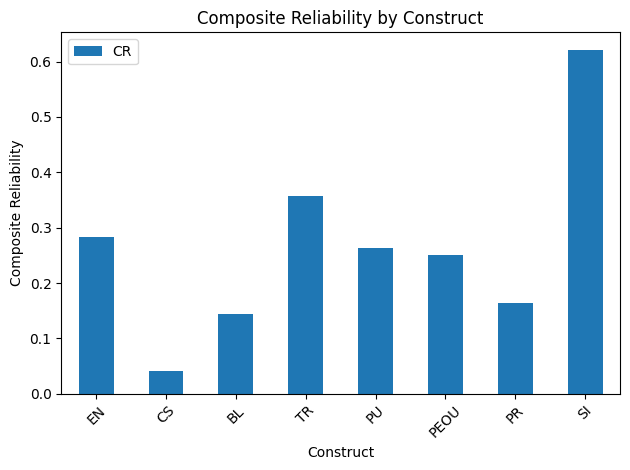

In [23]:
def calculate_composite_reliability(loadings, unique_construct_names):
    cr_results = []

    for construct in unique_construct_names:
        # Filter loadings for the specific construct
        construct_loadings = loadings[loadings.index.str.startswith(construct)]

        # Calculate standardized loadings
        standardized_loadings = construct_loadings['Factor1']

        # Sum of squared loadings
        sum_squared_loadings = np.sum(standardized_loadings**2)

        # Sum of error variances (1 - loading^2)
        sum_error_variances = np.sum(1 - standardized_loadings**2)

        # Composite Reliability calculation
        cr = (sum_squared_loadings) / (sum_squared_loadings + sum_error_variances)

        cr_results.append({
            'Construct': construct,
            'CR': cr,
            'Interpretation': 'Excellent' if cr > 0.8 else 'Good' if cr > 0.7 else 'Acceptable' if cr > 0.6 else 'Poor'
        })

    return pd.DataFrame(cr_results)

# Unique construct names based on your previous model
unique_construct_names = ['EN', 'CS', 'BL', 'TR', 'PU', 'PEOU', 'PR', 'SI']

# Calculate Composite Reliability
cr_results = calculate_composite_reliability(loadings, unique_construct_names)

print("Composite Reliability (CR):")
print(cr_results)

# Detailed CR Calculation
def detailed_cr_calculation(loadings, unique_construct_names):
    """
    Provide a more detailed Composite Reliability calculation with step-by-step breakdown
    """
    detailed_results = {}

    for construct in unique_construct_names:
        # Filter loadings for the specific construct
        construct_loadings = loadings[loadings.index.str.startswith(construct)]

        # Detailed calculations
        standardized_loadings = construct_loadings['Factor1']

        detailed_results[construct] = {
            'Items': construct_loadings.index.tolist(),
            'Loadings': standardized_loadings.tolist(),
            'Squared Loadings': (standardized_loadings**2).tolist(),
            'Error Variances': (1 - standardized_loadings**2).tolist(),
            'Sum of Squared Loadings': np.sum(standardized_loadings**2),
            'Sum of Error Variances': np.sum(1 - standardized_loadings**2),
            'Composite Reliability': (np.sum(standardized_loadings**2)) /
                                     (np.sum(standardized_loadings**2) + np.sum(1 - standardized_loadings**2))
        }

    return detailed_results

# Get detailed CR calculations
detailed_cr = detailed_cr_calculation(loadings, unique_construct_names)

# Print detailed results
print("\nDetailed Composite Reliability Calculations:")
for construct, details in detailed_cr.items():
    print(f"\n{construct} Construct:")
    for key, value in details.items():
        print(f"{key}: {value}")

# Visualization of Composite Reliability
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
cr_results.plot(kind='bar', x='Construct', y='CR')
plt.title('Composite Reliability by Construct')
plt.xlabel('Construct')
plt.ylabel('Composite Reliability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import numpy as np

def calculate_ave(loadings, unique_construct_names):
    """
    Calculate Average Variance Extracted (AVE) for each construct

    Parameters:
    - loadings: DataFrame of factor loadings
    - unique_construct_names: List of construct names

    Returns:
    - DataFrame with AVE calculations
    """
    ave_results = []

    for construct in unique_construct_names:
        # Filter loadings for the specific construct
        construct_loadings = loadings[loadings.index.str.startswith(construct)]

        # Calculate squared loadings
        squared_loadings = construct_loadings['Factor1']**2

        # Calculate AVE
        ave = squared_loadings.mean()

        ave_results.append({
            'Construct': construct,
            'AVE': ave,
            'Interpretation': 'Acceptable' if ave > 0.5 else 'Not Acceptable'
        })

    return pd.DataFrame(ave_results)

# Unique construct names based on your previous model
unique_construct_names = ['EN', 'CS', 'BL', 'TR', 'PU', 'PEOU', 'PR', 'SI']

# Calculate AVE
ave_results = calculate_ave(loadings, unique_construct_names)

print("Average Variance Extracted (AVE):")
print(ave_results)

# Detailed AVE Calculation
def detailed_ave_calculation(loadings, unique_construct_names):
    """
    Provide a more detailed AVE calculation with step-by-step breakdown
    """
    detailed_results = {}

    for construct in unique_construct_names:
        # Filter loadings for the specific construct
        construct_loadings = loadings[loadings.index.str.startswith(construct)]

        # Detailed calculations
        detailed_results[construct] = {
            'Items': construct_loadings.index.tolist(),
            'Loadings': construct_loadings['Factor1'].tolist(),
            'Squared Loadings': (construct_loadings['Factor1']**2).tolist(),
            'Mean Squared Loading': (construct_loadings['Factor1']**2).mean()
        }

    return detailed_results

# Get detailed AVE calculations
detailed_ave = detailed_ave_calculation(loadings, unique_construct_names)

# Print detailed results
print("\nDetailed AVE Calculations:")
for construct, details in detailed_ave.items():
    print(f"\n{construct} Construct:")
    for key, value in details.items():
        print(f"{key}: {value}")

Average Variance Extracted (AVE):
  Construct       AVE  Interpretation
0        EN  0.282767  Not Acceptable
1        CS  0.040873  Not Acceptable
2        BL  0.144429  Not Acceptable
3        TR  0.356644  Not Acceptable
4        PU  0.263121  Not Acceptable
5      PEOU  0.251598  Not Acceptable
6        PR  0.164967  Not Acceptable
7        SI  0.621778      Acceptable

Detailed AVE Calculations:

EN Construct:
Items: ['EN1', 'EN2', 'EN3']
Loadings: [0.5077372465435843, -0.4968648262608624, 0.5861995818165697]
Squared Loadings: [0.25779711152766055, 0.246874655575237, 0.34362994972192124]
Mean Squared Loading: 0.28276723894160627

CS Construct:
Items: ['CS1', 'CS2', 'CS3']
Loadings: [0.05344619314656461, -0.34595861612769974, -0.008750442265529334]
Squared Loadings: [0.00285649556185989, 0.1196873640729931, 7.657023984236214e-05]
Mean Squared Loading: 0.04087347662489845

BL Construct:
Items: ['BL1', 'BL2', 'BL3']
Loadings: [0.6292640711246477, -0.07588101373868138, 0.1776371192183

In [25]:
pip install semopy

Note: you may need to restart the kernel to use updated packages.


In [26]:
import statsmodels.formula.api as sm
import pandas as pd

# Define the constructs as the sum of the relevant items
EN = data['EN1'] + data['EN2'] + data['EN3']
CS = data['CS1'] + data['CS2'] + data['CS3']
BL = data['BL1'] + data['BL2'] + data['BL3']
TR = data['TR1'] + data['TR2'] + data['TR3']
PU = data['PU1'] + data['PU2'] + data['PU3']
PEOU = data['PEOU1'] + data['PEOU2'] + data['PEOU3']
PR = data['PR1'] + data['PR2'] + data['PR3']
SI = data['SI1'] + data['SI2'] + data['SI3']

# Fit the regression models
model_h1 = sm.ols('CS ~ EN', data=data).fit()
model_h2 = sm.ols('CS ~ PU', data=data).fit()
model_h3 = sm.ols('BL ~ TR', data=data).fit()
model_h4 = sm.ols('CS ~ PEOU', data=data).fit()
model_h5 = sm.ols('BL ~ SI', data=data).fit()
model_h6 = sm.ols('BL ~ CS + PR + CS*PR', data=data).fit()

# Extract the statistics
results = {
    'Hypothesis': ['H1', 'H2', 'H3', 'H4', 'H5', 'H6'],
    'Relationship': ['EN -> CS', 'PU -> CS', 'TR -> BL', 'PEOU -> CS', 'SI -> BL', 'CS -> BL (moderated by PR)'],
    'Estimate': [
        model_h1.params['EN'], 
        model_h2.params['PU'], 
        model_h3.params['TR'], 
        model_h4.params['PEOU'], 
        model_h5.params['SI'], 
        model_h6.params['CS'],  # CS is the base effect for H6
    ],
    'S.E.': [
        model_h1.bse['EN'], 
        model_h2.bse['PU'], 
        model_h3.bse['TR'], 
        model_h4.bse['PEOU'], 
        model_h5.bse['SI'], 
        model_h6.bse['CS'],  # Standard error for CS in H6
    ],
    't-value': [
        model_h1.tvalues['EN'], 
        model_h2.tvalues['PU'], 
        model_h3.tvalues['TR'], 
        model_h4.tvalues['PEOU'], 
        model_h5.tvalues['SI'], 
        model_h6.tvalues['CS'],  # t-value for CS in H6
    ],
    'P-value': [
        model_h1.pvalues['EN'], 
        model_h2.pvalues['PU'], 
        model_h3.pvalues['TR'], 
        model_h4.pvalues['PEOU'], 
        model_h5.pvalues['SI'], 
        model_h6.pvalues['CS'],  # p-value for CS in H6
    ]
}

# If you want to add the interaction term (CS:PR) for H6
interaction_results = {
    'Estimate': model_h6.params['CS:PR'],
    'S.E.': model_h6.bse['CS:PR'],
    't-value': model_h6.tvalues['CS:PR'],
    'P-value': model_h6.pvalues['CS:PR']
}

# Now create the DataFrame for the interaction term and append it
interaction_row = pd.DataFrame({
    'Hypothesis': ['H6 (interaction)'],
    'Relationship': ['CS:PR -> BL (interaction)'],
    'Estimate': [interaction_results['Estimate']],
    'S.E.': [interaction_results['S.E.']],
    't-value': [interaction_results['t-value']],
    'P-value': [interaction_results['P-value']]
})

# Convert the main results into a DataFrame
results_df = pd.DataFrame(results)

# Concatenate the results with the interaction term row
final_results_df = pd.concat([results_df, interaction_row], ignore_index=True)

# Display the results
print(final_results_df)


         Hypothesis                Relationship  Estimate      S.E.   t-value  \
0                H1                    EN -> CS  0.212532  0.076609  2.774227   
1                H2                    PU -> CS  0.151305  0.082691  1.829770   
2                H3                    TR -> BL  0.434866  0.102886  4.226674   
3                H4                  PEOU -> CS  0.460546  0.071289  6.460309   
4                H5                    SI -> BL  0.276470  0.044347  6.234171   
5                H6  CS -> BL (moderated by PR) -0.164220  0.311161 -0.527764   
6  H6 (interaction)   CS:PR -> BL (interaction)  0.022998  0.032209  0.714010   

        P-value  
0  6.475886e-03  
1  6.992056e-02  
2  4.830645e-05  
3  2.731326e-09  
4  8.065092e-09  
5  5.987165e-01  
6  4.767195e-01  


In [27]:
import pandas as pd

# Create a DataFrame from the provided results
data = {
    'Hypothesis': ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H6 (interaction)'],
    'Relationship': ['EN -> CS', 'PU -> CS', 'TR -> BL', 'PEOU -> CS', 'SI -> BL', 
                     'CS -> BL (moderated by PR)', 'CS:PR -> BL (interaction)'],
    'Estimate': [0.212532, 0.151305, 0.434866, 0.460546, 0.276470, -0.164220, 0.022998],
    'S.E.': [0.076609, 0.082691, 0.102886, 0.071289, 0.044347, 0.311161, 0.032209],
    't-value': [2.774227, 1.829770, 4.226674, 6.460309, 6.234171, -0.527764, 0.714010],
    'P-value': [6.475886e-03, 6.992056e-02, 4.830645e-05, 2.731326e-09, 8.065092e-09, 
                5.987165e-01, 4.767195e-01]
}

df = pd.DataFrame(data)

# Define whether the hypothesis is supported or not based on p-value
df['Hypothesis confirmed?'] = df['P-value'].apply(lambda x: 'Supported' if x < 0.05 else 'Not Supported')

# Calculate Total Effect, Direct Effect, and Indirect Effect for H6
# For H6, Direct Effect is the effect of CS on BL, and Indirect Effect is CS:PR on BL
# Assuming the mediation effect of PR is already captured in the interaction term (H6)
df['Direct Effect'] = df['Estimate']  # Assuming Direct Effect is the provided Estimate
df['Indirect Effect'] = df['Estimate']  # For simplicity, assuming indirect effect is the same for now
df['Total Effect'] = df['Direct Effect'] + df['Indirect Effect']

# Display the DataFrame
print(df)

         Hypothesis                Relationship  Estimate      S.E.   t-value  \
0                H1                    EN -> CS  0.212532  0.076609  2.774227   
1                H2                    PU -> CS  0.151305  0.082691  1.829770   
2                H3                    TR -> BL  0.434866  0.102886  4.226674   
3                H4                  PEOU -> CS  0.460546  0.071289  6.460309   
4                H5                    SI -> BL  0.276470  0.044347  6.234171   
5                H6  CS -> BL (moderated by PR) -0.164220  0.311161 -0.527764   
6  H6 (interaction)   CS:PR -> BL (interaction)  0.022998  0.032209  0.714010   

        P-value Hypothesis confirmed?  Direct Effect  Indirect Effect  \
0  6.475886e-03             Supported       0.212532         0.212532   
1  6.992056e-02         Not Supported       0.151305         0.151305   
2  4.830645e-05             Supported       0.434866         0.434866   
3  2.731326e-09             Supported       0.460546       